# Lesson 9: Statistical Data Analysis

This section is using some of the skills you've learned to perform data analysis, which is an important use of coding and using the Pandas data analysis library and Numpy.

Watch the two video lectures on statistics then work independently on coding up the parameters shown in the videos in the parts below.

* Submit parts 1$-$3 in a single python script (worth 3%)

## Part 1 (1%)

* Read in `Files/soil_regression.xlsx`
* Take out the `"PI (%)"` column as $x$ values and the `"CBR (%)"` column as $y$ values
* Calculate the fitting parameters `a0` and `a1`

In [1]:
# Part 1
### BEGIN SOLUTION

import pandas as pd

data = pd.read_excel("Files/soil_regression.xlsx").set_index("sample")

x = data["PI (%)"]
y = data["CBR (%)"]

n=len(x)

a0 = ( sum(x**2)*sum(y) - sum(x)*sum(x*y) )/( n*sum(x**2) - sum(x)**2 )
a1 = ( n*sum(x*y) - sum(x)*sum(y) )/( n*sum(x**2) - sum(x)**2 )

### END SOLUTION
              

* Run the cell below to check your values of $a_0$ and $a_1$

In [2]:
print(a0, a1)

5.304019971956217 -0.11270529225171834


#### Expected result:
```
5.304019... -0.112705...
```
(these will be checked by the marking script with more decimal places)

---

## Part 2 (1%)

* Write a function that returns a predicted $y$ value based on a new $x$ value, based on the linear model $\widehat y = a_0 + a_1 x$

In [3]:
# Part 2
### BEGIN SOLUTION
def prediction(a0, a1, x):
    y = a0 + a1*x 
    return y
### END SOLUTION

* Run the cell below to check your function

In [4]:
xnew = 30
ypred = prediction(a0, a1, xnew)
print(ypred)

1.9228612044046671


#### Expected result:

```
1.922861...
```
(this will be checked by the marking script with extra decimal places)

---

## Part 3 (1%)

* Using the array of `PI (%)` measurements as the $x$ values, calculate an array of model $\widehat y$ values, given by the linear model $\widehat y = a_0 + a_1 x$
* Calculate the coefficient of determination (goodness of fit) based on the equation at the end of the second statistics lecture:  

$$R^2 = 1-\dfrac{\text{unexplained variation}}{\text{total variation}}.$$

In [5]:
# Part 3
### BEGIN SOLUTION
y_hat = prediction(a0, a1, x)

residuals = y - y_hat
devs_mean = y - y.mean()

unexp_var = sum(residuals**2)
total_var = sum(devs_mean**2)

r2 = 1 - unexp_var/total_var
### END SOLUTION

In [6]:
print(r2)

0.45781814948918276


#### Expected result:
```
0.457818...
```
(this will be checked by the marking script with extra decimal places)

## Extra (for fun)

### Part A

* Put the (rounded) model $\widehat y$ values back into the DataFrame
* Sort the DataFrame by the `"PI (%)"` column

In [7]:
### BEGIN SOLUTION
data["model y"] = y_hat.round(2)

data.sort_values("PI (%)", inplace=True) 


## next few lines create a markdown table for the info cell
print_table = False
#print_table = True
if print_table:
    print(f'| sample | PI (%) | CBR (%) | model y |')
    print(f'| - | - | - | - |')   
    for line in data.iterrows():
        s,d = line[0:2]
        print(f'| $\\bf {s}$ | {d["PI (%)"]} | {d["CBR (%)"]} | {d["model y"]} |')

### END SOLUTION

data

PI (%)  CBR (%)  model y
sample                          
4         10.0     4.18     4.18
10        10.7     3.45     4.10
11        16.0     3.94     3.50
12        18.5     3.28     3.22
20        20.0     1.50     3.05
6         20.0     3.20     3.05
15        22.0     4.92     2.82
18        22.0     3.12     2.82
16        22.4     3.28     2.78
7         24.0     1.56     2.60
13        24.0     2.95     2.60
3         25.0     2.03     2.49
9         26.0     2.05     2.37
5         27.0     2.79     2.26
8         28.0     2.54     2.15
19        31.0     1.31     1.81
2         35.0     1.06     1.36

#### Expected format:

| sample | PI (%) | CBR (%) | model y |
| - | - | - | - |
| $\bf 4$ | 10.0 | 4.18 | 4.18 |
| $\bf 10$ | 10.7 | 3.45 | 4.1 |
| $\bf 11$ | 16.0 | 3.94 | 3.5 |
| $\bf 12$ | 18.5 | 3.28 | 3.22 |
| $\bf 20$ | 20.0 | 1.5 | 3.05 |
| $\bf 6$ | 20.0 | 3.2 | 3.05 |
| $\bf 15$ | 22.0 | 4.92 | 2.82 |
| $\bf 18$ | 22.0 | 3.12 | 2.82 |
| $\bf 16$ | 22.4 | 3.28 | 2.78 |
| $\bf 7$ | 24.0 | 1.56 | 2.6 |
| $\bf 13$ | 24.0 | 2.95 | 2.6 |
| $\bf 3$ | 25.0 | 2.03 | 2.49 |
| $\bf 9$ | 26.0 | 2.05 | 2.37 |
| $\bf 5$ | 27.0 | 2.79 | 2.26 |
| $\bf 8$ | 28.0 | 2.54 | 2.15 |
| $\bf 19$ | 31.0 | 1.31 | 1.81 |
| $\bf 2$ | 35.0 | 1.06 | 1.36 |

---

### Part B

* Plot a scatter graph of the measured `PI (%)` against `CBR (%)` values
* Plot the `model y` ($\widehat y$) values as a line on top of this.

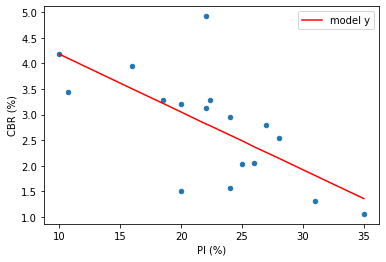

In [8]:
### BEGIN SOLUTION
 
ax1 = data.plot.scatter("PI (%)", "CBR (%)")
data.plot("PI (%)", "model y", ax=ax1, color="r")

fig=ax1.figure
#fig.savefig("Figures/modely.png")
fig.show()
### END SOLUTION

#### Expected result:

![](Figures/modely.png)

## Finally

Various libraries can be used to do the tasks for you.

### Fitting

In [2]:
import numpy as np

xvals,yvals = np.loadtxt("Files/soils.csv", delimiter=',', skiprows=1).transpose()[1:3]

degree = 1 # 1D "linear" fit
m, c = np.polyfit(xvals, yvals, degree)

print(c, m)

5.304019971956222 -0.11270529225171848


* Compare these values with the ones you got in **Part 1**

### Coefficient of determination

In Numpy you can use the correlation coefficient function:

In [3]:
corrs = np.corrcoef(xvals, yvals)

print(corrs**2)

[[1.         0.45781815]
 [0.45781815 1.        ]]


* Compare the value at index `[0,1]` to your $R^2$ calculation in Part 3

Another way is using the Scientific Python `scipy` library

In [4]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(xvals, yvals)

print(r_value**2, intercept, slope)

0.4578181494891826 5.304019971956221 -0.1127052922517184


Or even a simple function in the powerful machine learning library `sklearn`

In [8]:
from sklearn.metrics import r2_score

ypred = slope*xvals+intercept
print(r2_score(yvals, ypred))

0.457818149489183
